In [1]:
import pandas as pd
import numpy as np

In [2]:
#Delivery_time -> Predict delivery time using sorting time (So its SLR)

In [3]:
data = pd.read_csv("C:/Users/abc/Desktop/Assignments/Assignment 4/delivery_time.csv")

In [4]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
#Change the coulmn name
data.rename(columns={"Delivery Time":"Delivery_Time","Sorting Time":"Sorting_Time"},inplace= True)

In [6]:
data.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
data.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [9]:
# correlation in between -1 to 1 and correlation itself is 1.
data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [10]:
#distribution plot
import seaborn as sns

C:\Users\abc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

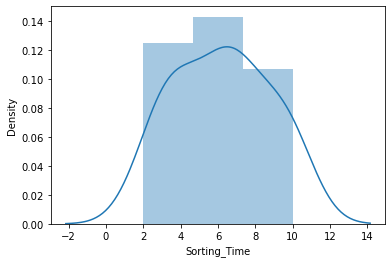

In [11]:
sns.distplot(data['Sorting_Time'])

In [12]:
# Transforming data using log funcation
data["log_sorting_time"]=np.log(data["Sorting_Time"]+1)

C:\Users\abc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_sorting_time', ylabel='Density'>

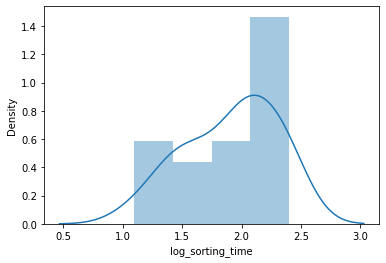

In [13]:
sns.distplot(data['log_sorting_time'])

C:\Users\abc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

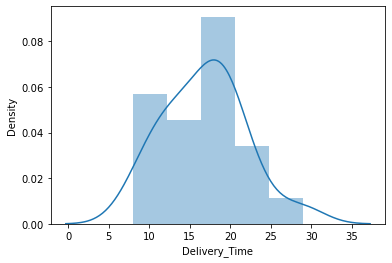

In [14]:
sns.distplot(data['Delivery_Time'])

In [15]:
import matplotlib.pyplot as plt

<AxesSubplot:>

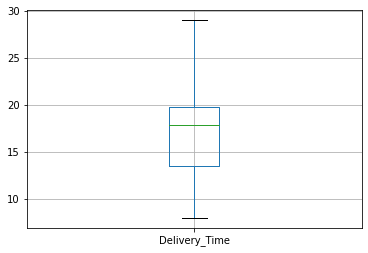

In [16]:
data.boxplot(["Delivery_Time"])

<AxesSubplot:>

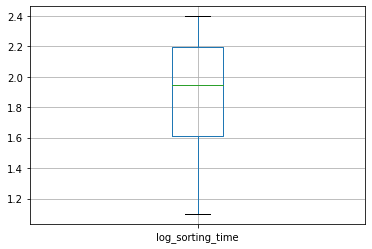

In [17]:
data.boxplot(["log_sorting_time"])

Text(0, 0.5, 'Delivery_Time')

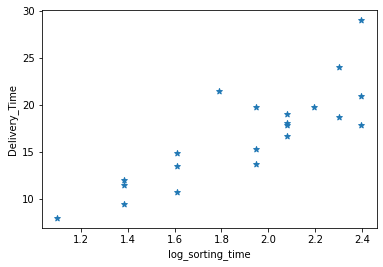

In [18]:
plt.scatter(data.log_sorting_time,data.Delivery_Time,marker='*')
plt.xlabel('log_sorting_time')
plt.ylabel('Delivery_Time')

In [19]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery_Time~log_sorting_time",data = data).fit()

<AxesSubplot:xlabel='log_sorting_time', ylabel='Delivery_Time'>

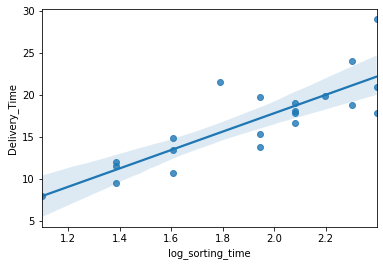

In [20]:
sns.regplot(x="log_sorting_time",y="Delivery_Time",data=data)

In [21]:
model.params

Intercept           -4.099013
log_sorting_time    10.959246
dtype: float64

In [22]:
#t & p-values from p values we know the coff of x is zero or not.
print(model.tvalues, '\n', model.pvalues)

Intercept          -1.272674
log_sorting_time    6.611817
dtype: float64 
 Intercept           0.218488
log_sorting_time    0.000003
dtype: float64


In [23]:
#R squared values (model is good or not our model is very good model)
(model.rsquared,model.rsquared_adj)

(0.6970476042045002, 0.6811027412678949)

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     43.72
Date:                Mon, 10 May 2021   Prob (F-statistic):           2.51e-06
Time:                        19:58:06   Log-Likelihood:                -50.857
No. Observations:                  21   AIC:                             105.7
Df Residuals:                      19   BIC:                             107.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -4.0990      3.221     -1.273      0.218     -10.840       2.642
log_sorting_time    10.9592      1.658      6.612      0.000       7.490      14.428
==============================================================================
Omnibus:                        5.318   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                3.314
Skew:                           0.929   Prob(JB):                        0.191
Kurtosis:                       3.580   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""